<hr>

##### Mount Drive - **Google Colab Only Step**

When using google colab in order to access files on our google drive we need to mount the drive by running the below python cell, then clicking the link it generates and pasting the code in the cell.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Change Directory To Access The Dependent Files - **Google Colab Only Step**

In [0]:
directory = "student"
if (directory == "student"):
  %cd drive/My\ Drive/Colab\ Notebooks/data-science-track/
else:
  %cd drive/Shared\ drives/Rubrik/Data\ Science/Course/Data-Science-Track

/content/drive/Shared drives/Rubrik/Data Science/Course/Data-Science-Track


<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Lesson 2
:</span> Data Cleaning</h1>
<hr>
Welcome to the workbook for <span style="color:royalblue">Lesson 2.1: Data Cleaning</span>! 

Remember, **better data beats better algorithms**.


<br><hr id="toc">

### In this lesson...

In this lesson, we'll cover the essential steps for building your analytical base table:
1. [Drop unwanted observations](#drop)
2. [Fix structural errors](#structural)
3. [Handle missing data](#missing-data)

Finally, we'll save the data to a new file so we can use it in other lessons.

<br><hr>

### First, let's import libraries and load the dataset.

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

We've provided comments for guidance.

In [0]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

## Import the employee dataset
- Use pandas' `read_csv()` function 
- Provide the following path for the data 
```python 
path = './data/employee_data.csv'
```

In [0]:
# Load employee data from CSV
df = pd.read_csv('./data/employee_data.csv')

Now we're ready to jump into cleaning the data!

<span id="drop"></span>
# 1. Drop wanted observations

The first step to data cleaning is removing samples from your dataset that you don't want to include in the model.

<br>

**First, <span style="color:royalblue">drop duplicates</span> from the dataset.**
* Then, print the shape of the new dataframe.

In [0]:
# Drop duplicates
print('Before dropping duplicates', df.shape)
df.drop_duplicates(inplace=True)
print('After dropping duplicates', df.shape)

Before dropping duplicates (14249, 10)
After dropping duplicates (14221, 10)


**Display all of the unique classes of the <code style="color:steelblue">'department'</code> feature**

In [0]:
# Unique classes of 'department'
df.department.unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

**Drop all observations that belong to the <span style="color:crimson">'temp'</span> department.**
* **Hint:** This is the same as keeping all that don't belong to that department.
* **Hint:** Remember to overwrite your original dataframe.
* Then, print the shape of the new dataframe.

In [0]:
# Drop temporary workers
df = df[df.department != 'temp']
df.shape

(14068, 10)

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="structural"></span>
# 2. Fix structural errors

The next bucket under data cleaning involves fixing structural errors, which arise during measurement, data transfer, or other types of "poor housekeeping."

<br>

**Print the unique values of <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code>.**

In [0]:
# Print unique values of 'filed_complaint'
print(df.filed_complaint.unique())

# Print unique values of 'recently_promoted'
print(df.recently_promoted.unique())

[nan  1.]
[nan  1.]


**Fill missing <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code> values with <code style="color:crimson">0</code>.**

In [0]:
# Missing filed_complaint values should be 0
df['filed_complaint'] = df.filed_complaint.fillna(0)
# Missing recently_promoted values should be 0
df['recently_promoted'] = df.recently_promoted.fillna(0)

**Print the unique values of <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code> again, just to confirm.**

In [0]:
# Print unique values of 'filed_complaint'
print(df.filed_complaint.unique())
# Print unique values of 'recently_promoted'
print(df.recently_promoted.unique())

[0. 1.]
[0. 1.]


**Replace any instances of <code style="color:crimson">'information_technology'</code> with <code style="color:crimson">'IT'</code> instead.**
* Remember to do it **inplace**.
* Then, plot the **bar chart** for <code style="color:steelblue">'department'</code> to see its new distribution.

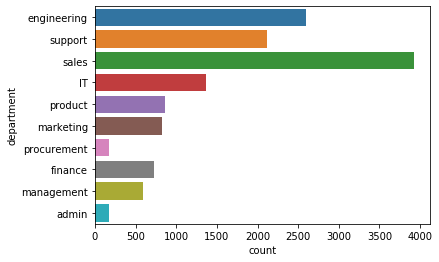

In [0]:
# 'information_technology' should be 'IT'
df.department.replace('information_technology', 'IT', inplace=True)
# Plot class distributions for 'department'
_ = sns.countplot(y='department', data=df)

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="missing-data"></span>
# 3. Handle missing data

Next, it's time to handle **missing data**. 

<br>

**Display the <span style="color:royalblue">number of missing values</span> for each feature (both categorical and numeric).**

In [0]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

**Label missing values in <code style="color:steelblue">'department'</code> as <code style="color:crimson">'Missing'</code>.**
* By the way, the <code style="color:steelblue">.fillna()</code> function also has an <code style="color:steelblue">inplace=</code> argument, just like the <code style="color:steelblue">.replace()</code> function.
* In the previous project, we just overwrote that column. This time, try using the <code style="color:steelblue">inplace=</code> argument instead.

In [0]:
# Fill missing values in department with 'Missing'
df['department'].fillna(0, inplace=True)

**First, let's flag <code style="color:steelblue">'last_evaluation'</code> with an indicator variable of missingness.** 
* <code style="color:crimson">0</code> if not missing.
* <code style="color:crimson">1</code> if missing. 

Let's name the new indicator variable <code style="color:steelblue">'last_evaluation_missing'</code>.
* We can use the <code style="color:steelblue">.isnull()</code> function.
* Also, remember to convert it with <code style="color:steelblue">.astype(int)</code>

In [0]:
# Indicator variable for missing last_evaluation
df['last_evaluation_missing'] = df['last_evaluation'].isnull().astype(int)

**Then, simply fill in the original missing value with <code style="color:crimson">0</code> just so your algorithms can run properly.**

In [0]:
# Fill missing values in last_evaluation with 0
df.last_evaluation.fillna(0, inplace=True)

**Display the number of missing values for each feature (both categorical and numeric) again, just to confirm.**

In [0]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="save-abt"></span>
# 5. Save the data

Finally, let's save the **cleaned data**. 

<br>

In [0]:
 # Save the dataframe to csv
df.to_csv('project_files/employee-data-clean.csv', index=None)

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<br>

## Next Steps

Congratulations for making through Lesson 2's Employee data cleaning!

As a reminder, here are a few things you did in this module:
* You cleaned dropped irrelevant observations from the dataset.
* You fixed various structural errors, such as wannabe indicator variables.
* You handled missing data.

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>